In [ ]:
# Machine learning tutorial k-means

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


In [7]:
# URL for Iris dataset CSV file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_data = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(iris_data.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


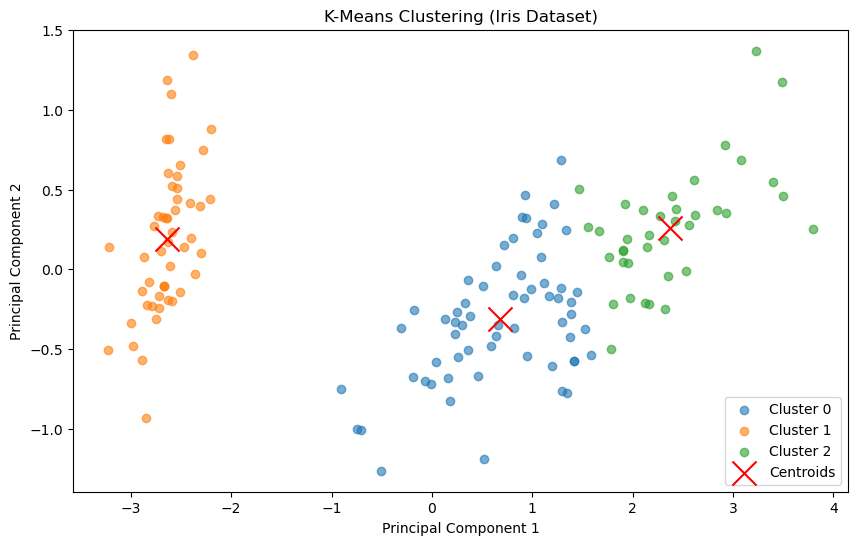

In [12]:
# Step 1: Load Iris Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_data = pd.read_csv(url, header=None, names=columns)

# Step 2: Preprocessing the Data
data = iris_data.iloc[:, :-1].values  # Extract features (drop the species column)

# Step 3: Define Number of Clusters
k = 3

# Step 4: Initialize and Fit K-Means Model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 5: Visualize the Clusters
# Apply PCA for dimensionality reduction to visualize the data
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
centroids_reduced = pca.transform(centroids)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_points = reduced_data[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", alpha=0.6)

# Plot centroids
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='red', marker='x', s=300, label='Centroids')
plt.title("K-Means Clustering (Iris Dataset)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

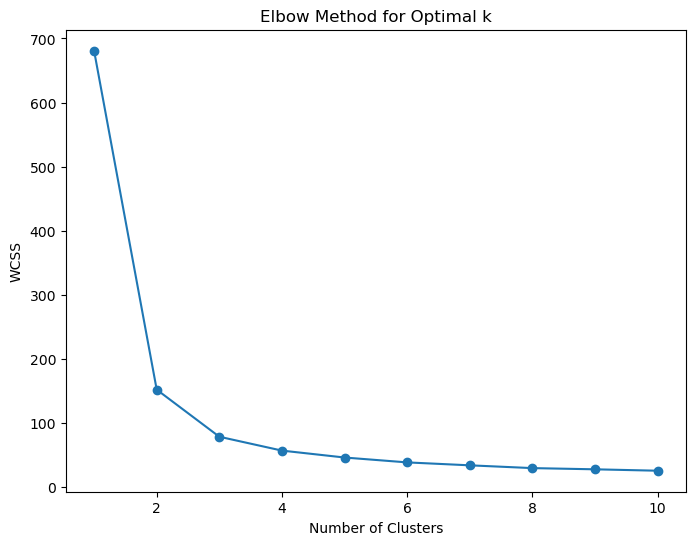

In [13]:
# Determine optimal k using Elbow Method
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs. k
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


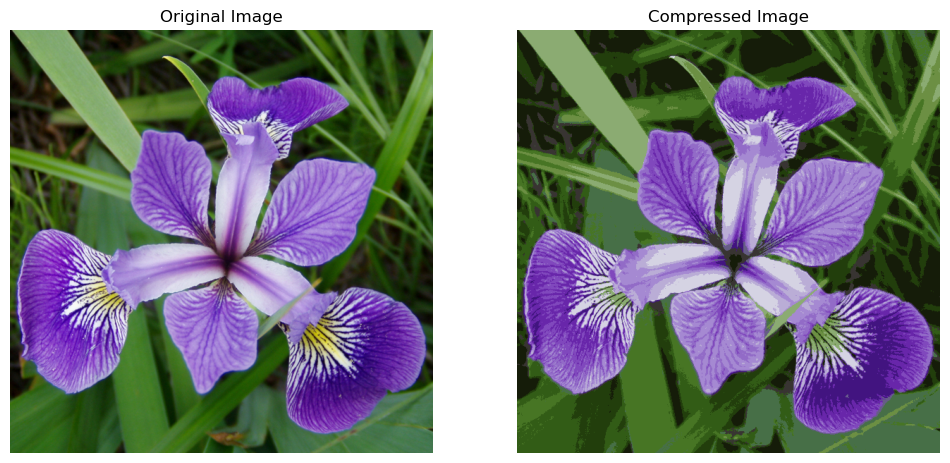

In [16]:
from skimage import data

# Load a sample image
image = data.astronaut()

# Rest of your code...
image = io.imread('iris.jpg')
image = image / 255.0  # Normalize pixel values
pixels = image.reshape(-1, 3)

# Apply K-Means
k = 16  # Number of colors
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Replace each pixel with its nearest centroid
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = compressed_pixels.reshape(image.shape)

# Display original and compressed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(compressed_image)
ax[1].set_title("Compressed Image")
ax[1].axis("off")
plt.show()